In [ ]:
# 이거 실행한 다음에 좌측 상단 '런타임 - 런타임 다시 시작' 을 클릭하여 런타임을 재시작해주세요! (plt 한글깨짐 방지)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
#나눔폰트사용
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seoul2021.csv')
df.head(1)

Mounted at /content/drive


,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391.0,25502,...,157,15667,7253,108,1098,2013,4344,7792,7568,28


In [ ]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import requests
import xml, xmltodict
import json
%matplotlib inline 

In [ ]:
#대분류(외식,서비스,소매)로 나누기
df.loc[df['서비스_업종_코드'].str.contains('CS1'),'분류'] = '외식업'
df.loc[df['서비스_업종_코드'].str.contains('CS2'),'분류'] = '서비스업'
df.loc[df['서비스_업종_코드'].str.contains('CS3'),'분류'] = '소매업'
df.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,분류
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391.0,25502,...,15667,7253,108,1098,2013,4344,7792,7568,28,외식업
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,122957138.0,12039,...,6679,4293,52,926,1222,2698,3404,2670,9,외식업
2,2021,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,5093349.0,177,...,124,36,0,0,9,18,62,71,3,외식업
3,2021,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,13507733.0,1359,...,356,881,0,243,260,213,288,235,5,외식업
4,2021,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,37551380.0,128,...,56,72,0,0,8,96,8,16,3,서비스업


In [ ]:
#필요한 열만 가져오기

food = df[df['분류']=='외식업']

food = food[['상권_코드','상권_코드_명', '서비스_업종_코드_명', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액','화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액','시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액','연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '점포수','분류']]
food['분류'].unique()

array(['외식업'], dtype=object)

In [ ]:
# 점포수로 나눠주지 않았기 때문에 한 점포당 매출이 아닌 전체 통합 매출 금액을 의미

div = ['분기당_매출_금액', '월요일_매출_금액','화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액','시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액','연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']

# for i in div:
#   food[i] = food[i] / food['점포수']

food.rename(columns={'분기당_매출_금액':'한_점포당_분기별_매출_금액'}, inplace=True)

food.head(2)

,상권_코드,상권_코드_명,서비스_업종_코드_명,한_점포당_분기별_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,...,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포수,분류
0,2110001,이북5도청사,한식음식점,626851391.0,367617856.0,259233535.0,61118890.0,81581781.0,81220388.0,70924228.0,...,369379103.0,168952823.0,934858,18452459,43587171.0,97353617.0,189319007.0,188684816.0,28,외식업
1,2110001,이북5도청사,분식전문점,122957138.0,61070094.0,61887044.0,8611528.0,15264108.0,10629354.0,15464848.0,...,64010667.0,47678846.0,251721,4661073,10112557.0,25115187.0,48256159.0,23292816.0,9,외식업


In [ ]:
# Open API 데이터 가져오기
key = '546f7464586a756e3733666b687678'
url1 = 'http://openapi.seoul.go.kr:8088/{}/xml/TbgisTrdarRelm/1/1000/'.format(key)
url2 = 'http://openapi.seoul.go.kr:8088/{}/xml/TbgisTrdarRelm/1001/1671/'.format(key)

# 1 ~ 1000 행
response1 = requests.get(url1)
content1 = response1.content
dict1 = xmltodict.parse(content1)
jsonString1 = json.dumps(dict1['TbgisTrdarRelm']['row'], ensure_ascii= False)
jsonObj1 = json.loads(jsonString1)

# 1001 ~ 1672 행
response2 = requests.get(url2)
content2 = response2.content
dict2 = xmltodict.parse(content2)
jsonString2 = json.dumps(dict2['TbgisTrdarRelm']['row'], ensure_ascii= False)
jsonObj2 = json.loads(jsonString2)

list_1 = []
list_2 = []
list_3 = []

for item in jsonObj1:
    list_1.append(item['TRDAR_CD'])
    list_2.append(item['XCNTS_VALUE'])
    list_3.append(item['YDNTS_VALUE'])

for item in jsonObj2:
    list_1.append(item['TRDAR_CD'])
    list_2.append(item['XCNTS_VALUE'])
    list_3.append(item['YDNTS_VALUE'])

In [ ]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.8 MB 7.0 MB/s 


In [ ]:
from pyproj import Proj, transform

# Projection 정의
proj_1 = Proj(init='epsg:5181')

# WGS84 경위도: GPS가 사용하는 좌표계 EPSG:4326
proj_2 = Proj(init='epsg:4326')

list_4 = []
list_5 = []

for item in list_2:
    list_4.append(int(item))

for item in list_3:
    list_5.append(int(item))

x_, y_ = transform(proj_1, proj_2, list_4, list_5)

dict_for_dataframe = {'상권_코드':list_1, 'X': x_, 'Y': y_}
coordinate = pd.DataFrame(dict_for_dataframe)
coordinate

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-14-955d65728d77>:18: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_, y_ = transform(proj_1, proj_2, list_4, list_5)


,상권_코드,X,Y
0,2110753,126.908844,37.448687
1,2110427,127.070978,37.634469
2,2110755,126.912978,37.451006
3,2110739,126.901564,37.441482
4,2111017,127.115614,37.509060
...,...,...,...
1666,1001493,127.011025,37.567312
1667,1001494,126.997374,37.569998
1668,1001495,127.115275,37.516476
1669,1001496,127.060059,37.511003


In [ ]:
# df2 = pd.read_csv('./subway.csv', encoding = 'cp949') # 지하철역 구버전
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/지하철역_위경도.xlsx')
df2 = df2.iloc[2:697,:]

df2[['역명','경도', '위도']].head(10)
df2.info()
df2.loc[[138],:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 2 to 696
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역명      695 non-null    object 
 1   위도      695 non-null    float64
 2   경도      695 non-null    float64
dtypes: float64(2), object(1)
memory usage: 16.4+ KB


,역명,위도,경도
138,김포공항역[5호선],37.562279,126.801368


In [ ]:
pro_food = food[['상권_코드','상권_코드_명']]
pro_food['상권_코드'] = pro_food['상권_코드'].astype('int64')
coordinate['상권_코드'] = coordinate['상권_코드'].astype('int64')
new_coord = pd.merge(pro_food, coordinate, on='상권_코드')
new_coord.drop(columns=['상권_코드'], inplace=True)
new_coord.drop_duplicates(['상권_코드_명'], inplace=True)
len(new_coord['Y'].unique())

food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36696 entries, 0 to 140802
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   상권_코드            36696 non-null  int64  
 1   상권_코드_명          36696 non-null  object 
 2   서비스_업종_코드_명      36696 non-null  object 
 3   한_점포당_분기별_매출_금액  36696 non-null  float64
 4   주중_매출_금액         36696 non-null  float64
 5   주말_매출_금액         36696 non-null  float64
 6   월요일_매출_금액        36696 non-null  float64
 7   화요일_매출_금액        36696 non-null  float64
 8   수요일_매출_금액        36696 non-null  float64
 9   목요일_매출_금액        36696 non-null  float64
 10  금요일_매출_금액        36696 non-null  float64
 11  토요일_매출_금액        36696 non-null  float64
 12  일요일_매출_금액        36696 non-null  float64
 13  시간대_00~06_매출_금액  36696 non-null  int64  
 14  시간대_06~11_매출_금액  36696 non-null  float64
 15  시간대_11~14_매출_금액  36696 non-null  float64
 16  시간대_14~17_매출_금액  36696 non-null  float64
 17  시간대_17~21_매

<ipython-input-18-92566915081e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_food['상권_코드'] = pro_food['상권_코드'].astype('int64')


In [48]:
# 전체 외식업 한점포당 1년 매출
# eatout = food.drop(columns=['상권_코드','점포수','서비스_업종_코드_명'])
# eatout = eatout.groupby(['상권_코드_명']).sum()

# store = ['한식음식점','중식음식점','일식음식점','양식음식점','제과점','패스트푸드점','치킨전문점','분식전문점','호프-간이주점','커피-음료']
eatout_korean = food[food['서비스_업종_코드_명'] == '한식음식점'].set_index('서비스_업종_코드_명')

eatout = eatout_korean.groupby(['상권_코드_명']).sum()
eatout.rename(columns={'한_점포당_분기별_매출_금액':'외식업_연매출_금액'}, inplace=True)
eatout.head()
# eatout = eatout[eatout.index=='한식음식점']

final_eatfood = pd.merge(eatout, new_coord, on='상권_코드_명')
final_eatfood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 1531
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   상권_코드_명          1532 non-null   object 
 1   상권_코드            1532 non-null   int64  
 2   외식업_연매출_금액       1532 non-null   float64
 3   주중_매출_금액         1532 non-null   float64
 4   주말_매출_금액         1532 non-null   float64
 5   월요일_매출_금액        1532 non-null   float64
 6   화요일_매출_금액        1532 non-null   float64
 7   수요일_매출_금액        1532 non-null   float64
 8   목요일_매출_금액        1532 non-null   float64
 9   금요일_매출_금액        1532 non-null   float64
 10  토요일_매출_금액        1532 non-null   float64
 11  일요일_매출_금액        1532 non-null   float64
 12  시간대_00~06_매출_금액  1532 non-null   int64  
 13  시간대_06~11_매출_금액  1532 non-null   float64
 14  시간대_11~14_매출_금액  1532 non-null   float64
 15  시간대_14~17_매출_금액  1532 non-null   float64
 16  시간대_17~21_매출_금액  1532 non-null   float64
 17  시간대_21~24_매출_금

In [ ]:
import math
import seaborn as sns

In [49]:
li = []
li_index = []

for index, eatfood_coor in final_eatfood.iterrows():
    # print(eatfood_coor)
    a1 = eatfood_coor.loc['X']
    b1 = eatfood_coor.loc['Y']
    count = 0
    length_fix = 4000
    for index_, df_coor in df2.iterrows():
        a2 = df_coor.loc['경도']
        b2 = df_coor.loc['위도']
        length = 133330*math.sqrt(math.cos(37.5)*((a2-a1)**2) + (b2-b1)**2)
        if length_fix > length:
            check = count
            length_fix = length
        count += 1
    if length_fix < 100:
        li.append(100)
    else:
        li.append(length_fix)
    # li_index.append(final_eatfood['외식업_연매출_금액'].loc[[check]])
    li_index.append(check)

# print(li)
# print(li_index)

In [50]:
subway_list = []
for i in li_index:
    subway_list.append(df2['역명'].iloc[i])

final_eatfood['가까운역_거리'] = li
final_eatfood['가까운역'] = subway_list

Text(0.5, 1.0, '한식음식점 상권 vs 역까지 거리')

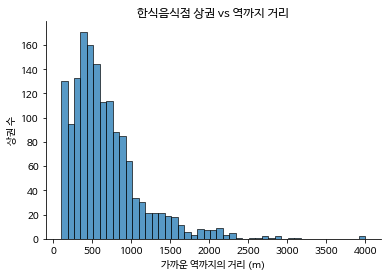

In [51]:
fig1, ax1 = plt.subplots()
# plt.xscale('log', base=10)
# plt.yscale('log', base=10)
# sns.scatterplot(ax=ax1, data=final_eatfood, x='가까운역_거리', y='점포수')
# sns.swarmplot(x='가까운역_거리',y='점포수',data=final_eatfood, palette='husl')

sns.histplot(x=final_eatfood['가까운역_거리'])
sns.despine()
plt.xlabel('가까운 역까지의 거리 (m)')
plt.ylabel('상권 수')
plt.title('한식음식점 상권 vs 역까지 거리')

In [52]:
station = final_eatfood[['가까운역','외식업_연매출_금액','점포수']]
station['근처상권수'] = 1
station = station.groupby(['가까운역']).sum()
station = station.sort_values(by='외식업_연매출_금액', ascending=False)

<ipython-input-52-4c597f2bd185>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['근처상권수'] = 1


In [53]:
top20 = station[0:20]

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


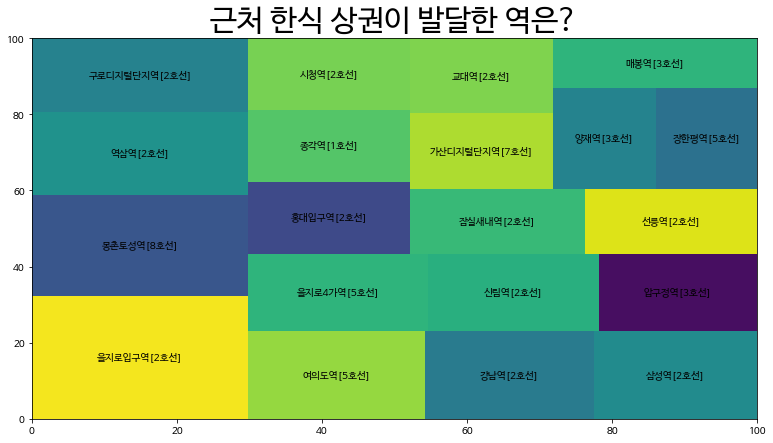

In [79]:
import squarify
plt.figure(figsize=(13, 7))
plt.title('근처 한식 상권이 발달한 역은?', fontsize = 30)
squarify.plot(top20['외식업_연매출_금액'], label=top20.index)